<a href="https://colab.research.google.com/github/sinku29/Data-Science-Assignment/blob/main/Clustering_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
crime_data = pd.read_csv("crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
# Displaying first ten records
crime_data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
# Shape of the data
crime_data.shape

(50, 5)

In [ ]:
# Summary of the data
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
# Check the data types
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
# Renaming the Unnamed: 0 Column into States
crime_data = crime_data.rename(columns={"Unnamed: 0":"States"})
crime_data.head(10)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
# Check for Null values
crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
# Check for duplicate values
crime_data[crime_data.duplicated()].shape

(0, 5)

In [ ]:
crime_data[crime_data.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


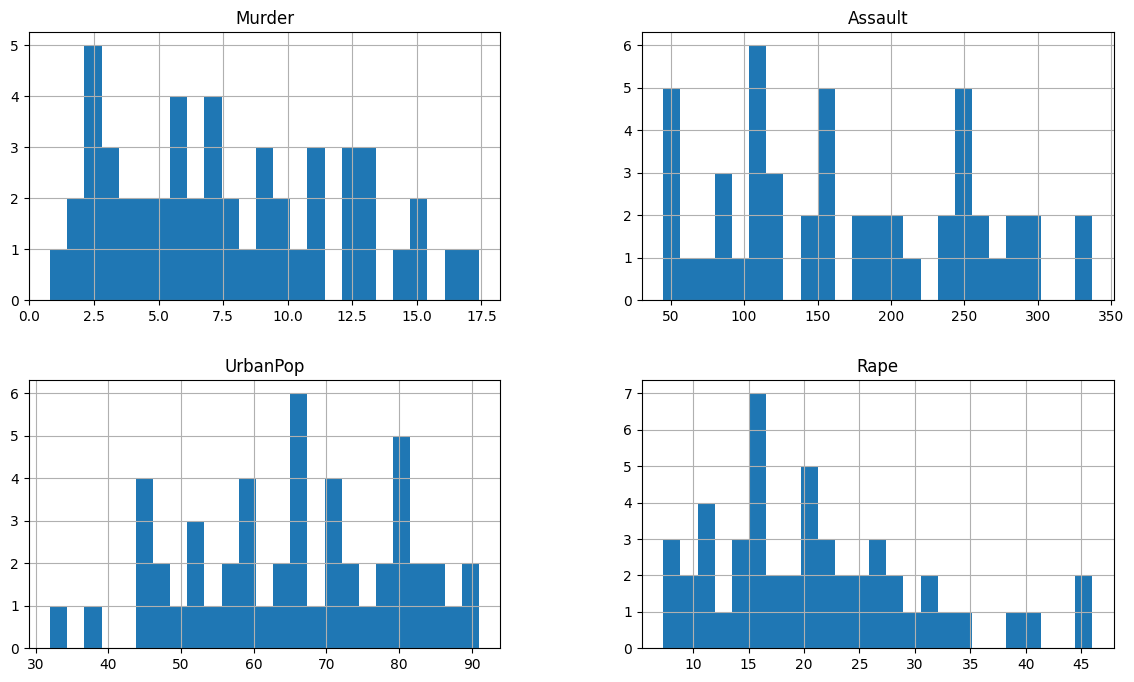

In [ ]:
crime_data.hist(figsize=(14,8),bins=25)
plt.show()

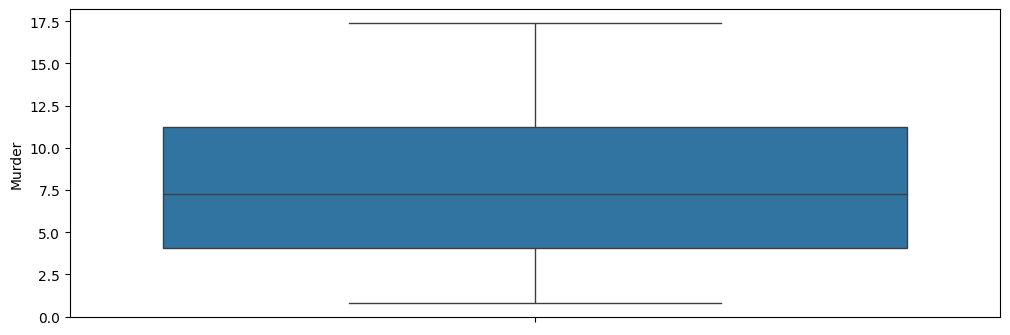

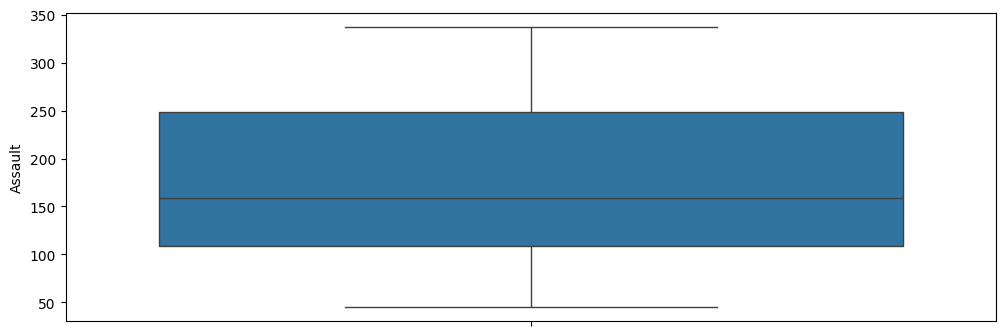

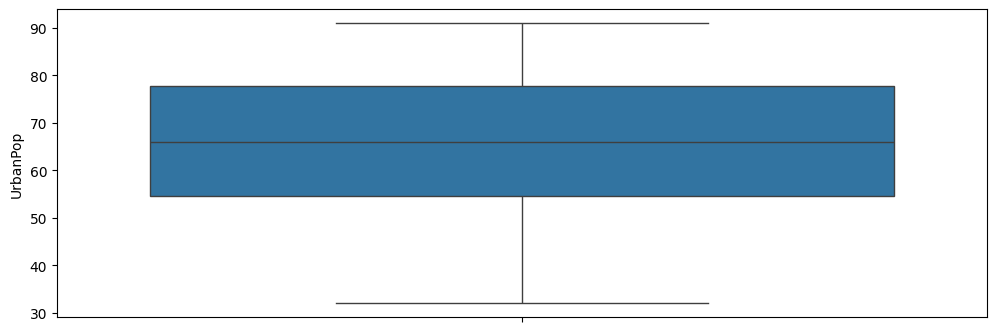

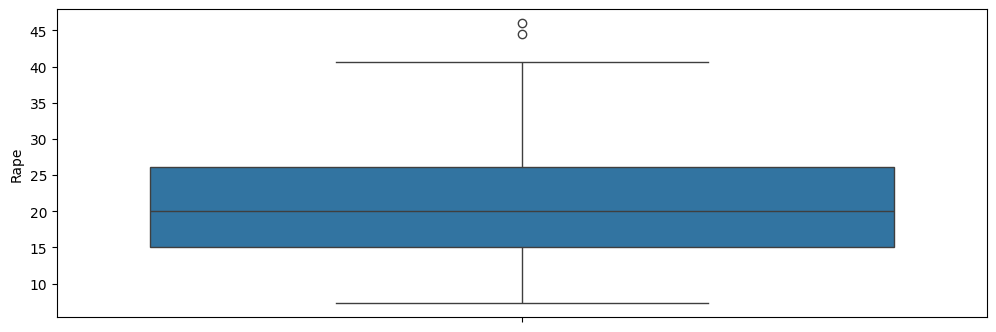

In [ ]:
for feature in crime_data.columns[1:]:
    plt.figure(figsize=(12,4))
    sb.boxplot(crime_data[feature])

<Axes: >

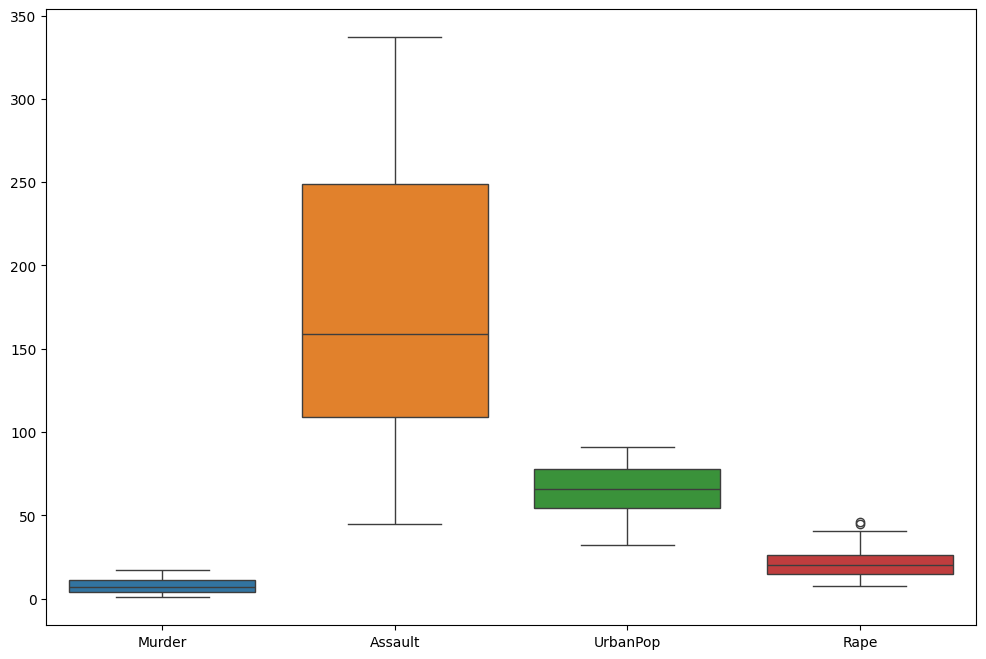

In [ ]:
plt.figure(figsize=(12,8))
sb.boxplot(data=crime_data)

In [ ]:
# Checking for Correlation between variables
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


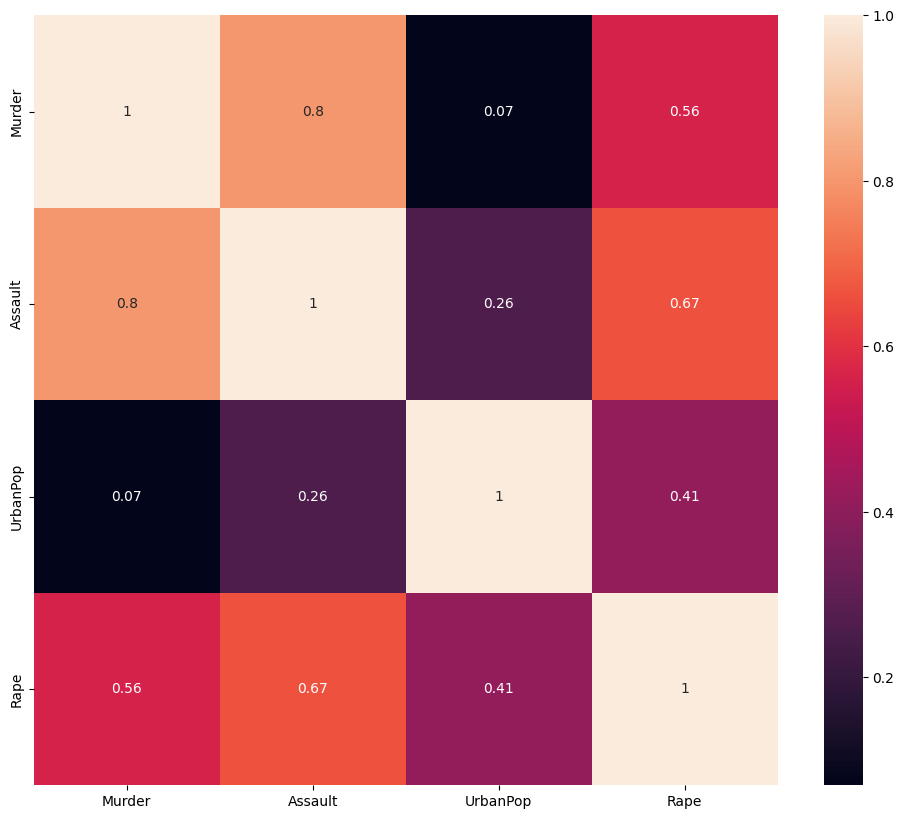

In [ ]:
plt.figure(figsize=(12,10))
sb.heatmap(crime_data.corr(),annot=True)
plt.show()

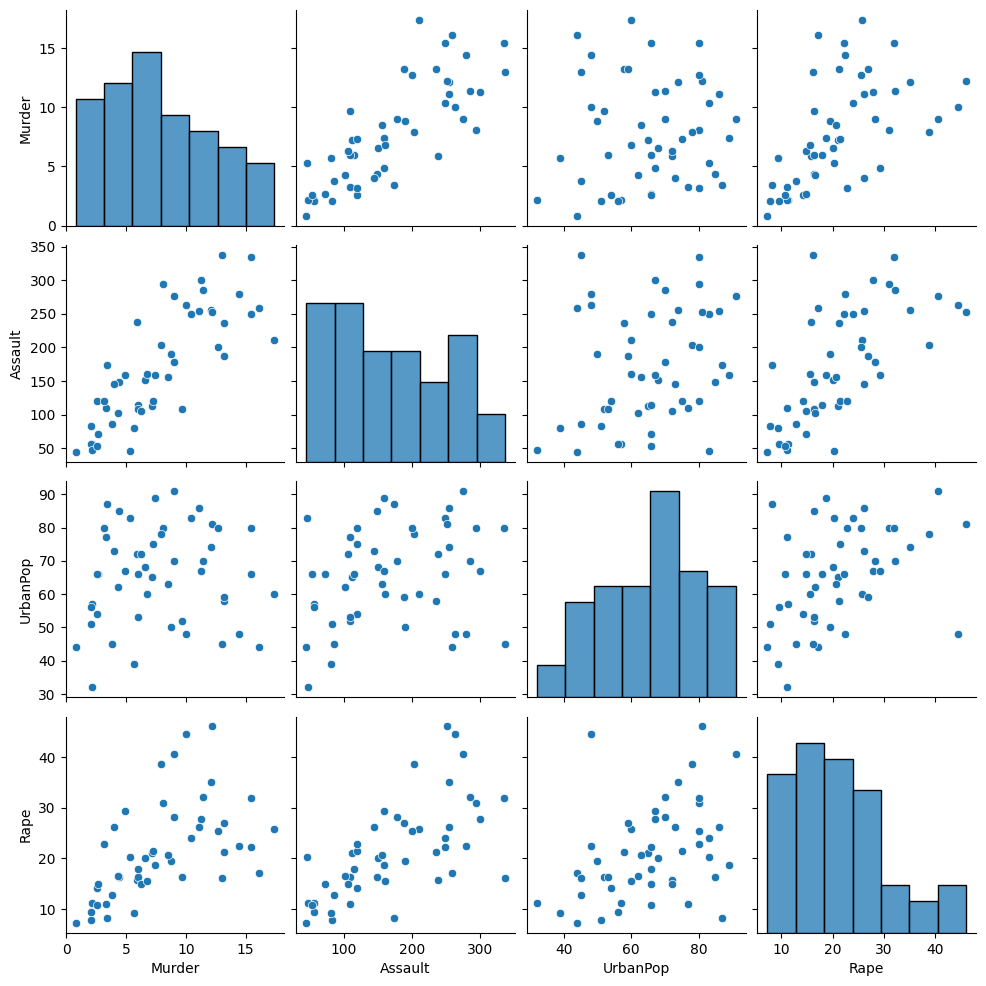

In [ ]:
sb.pairplot(data=crime_data)

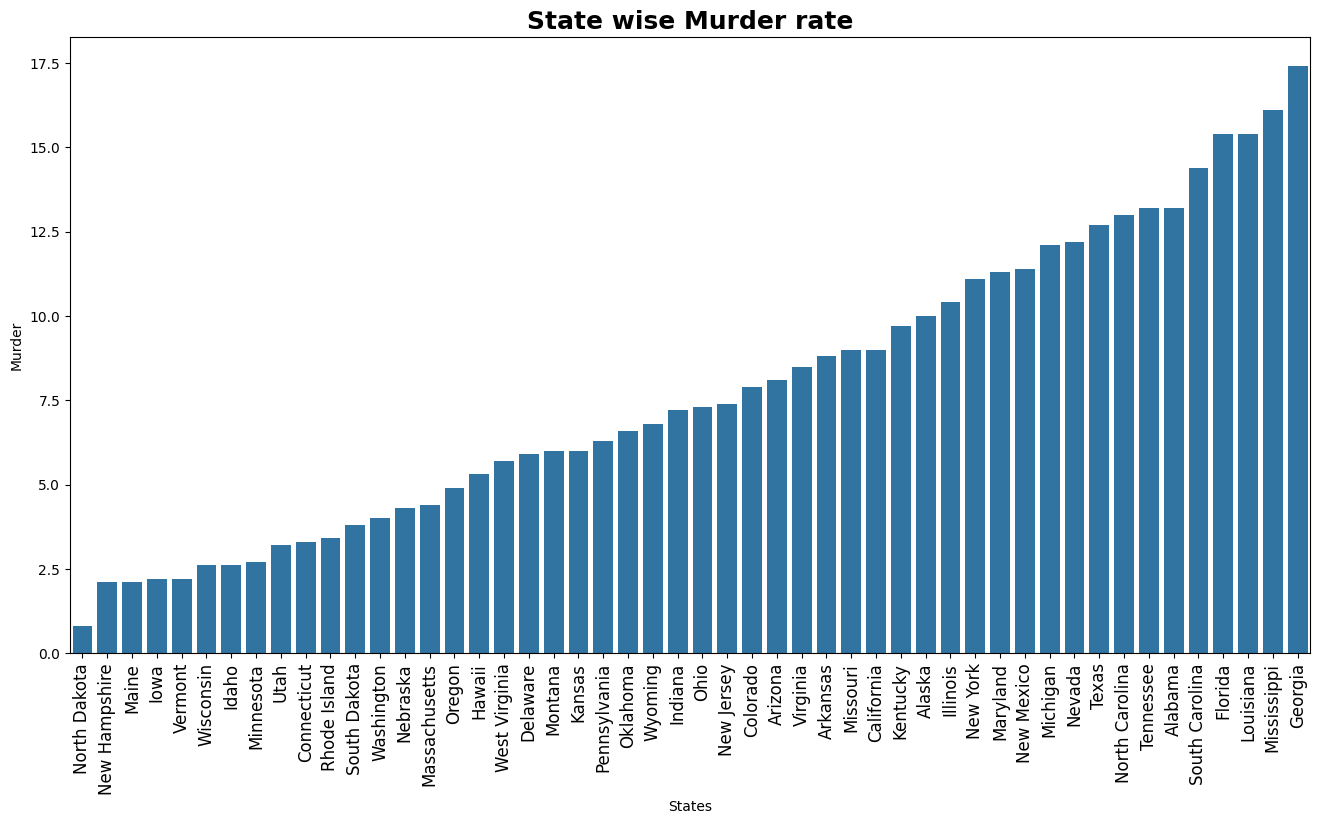

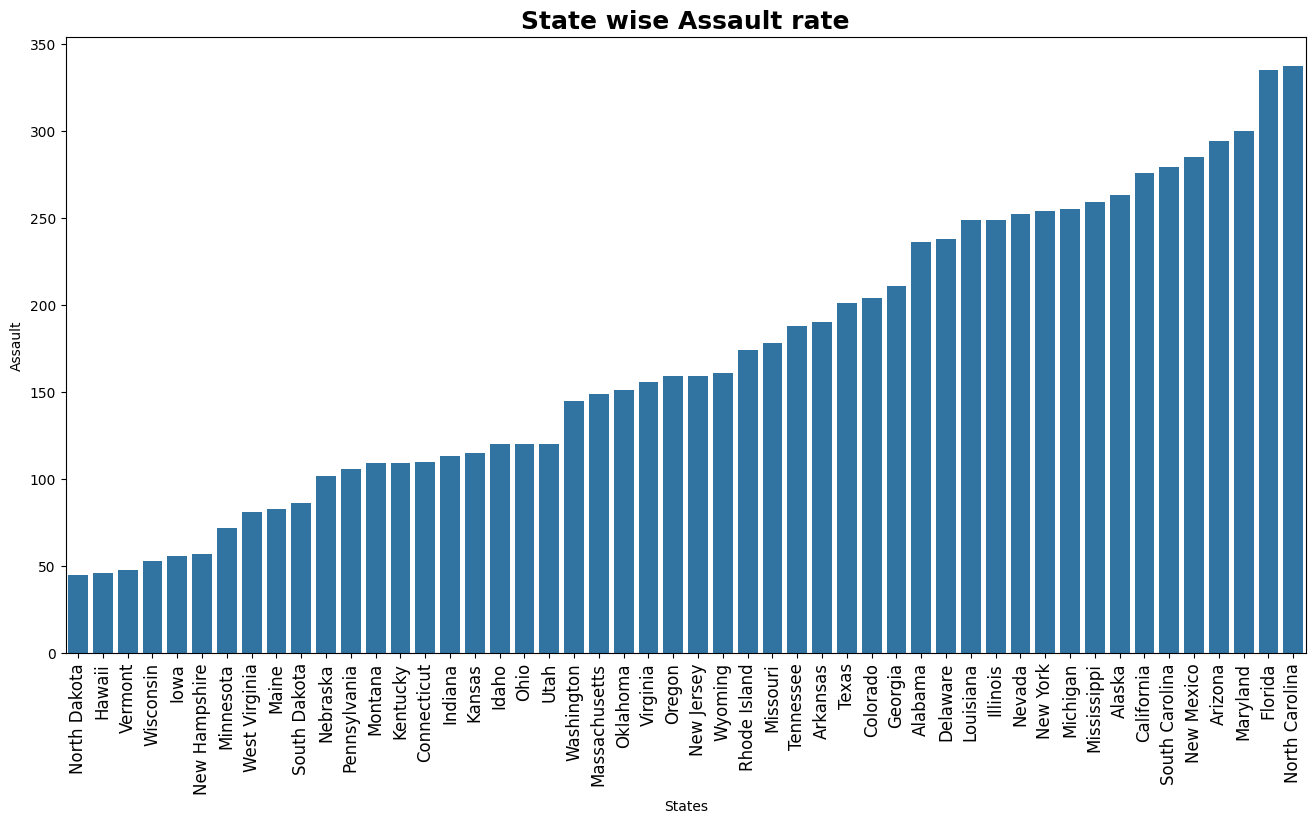

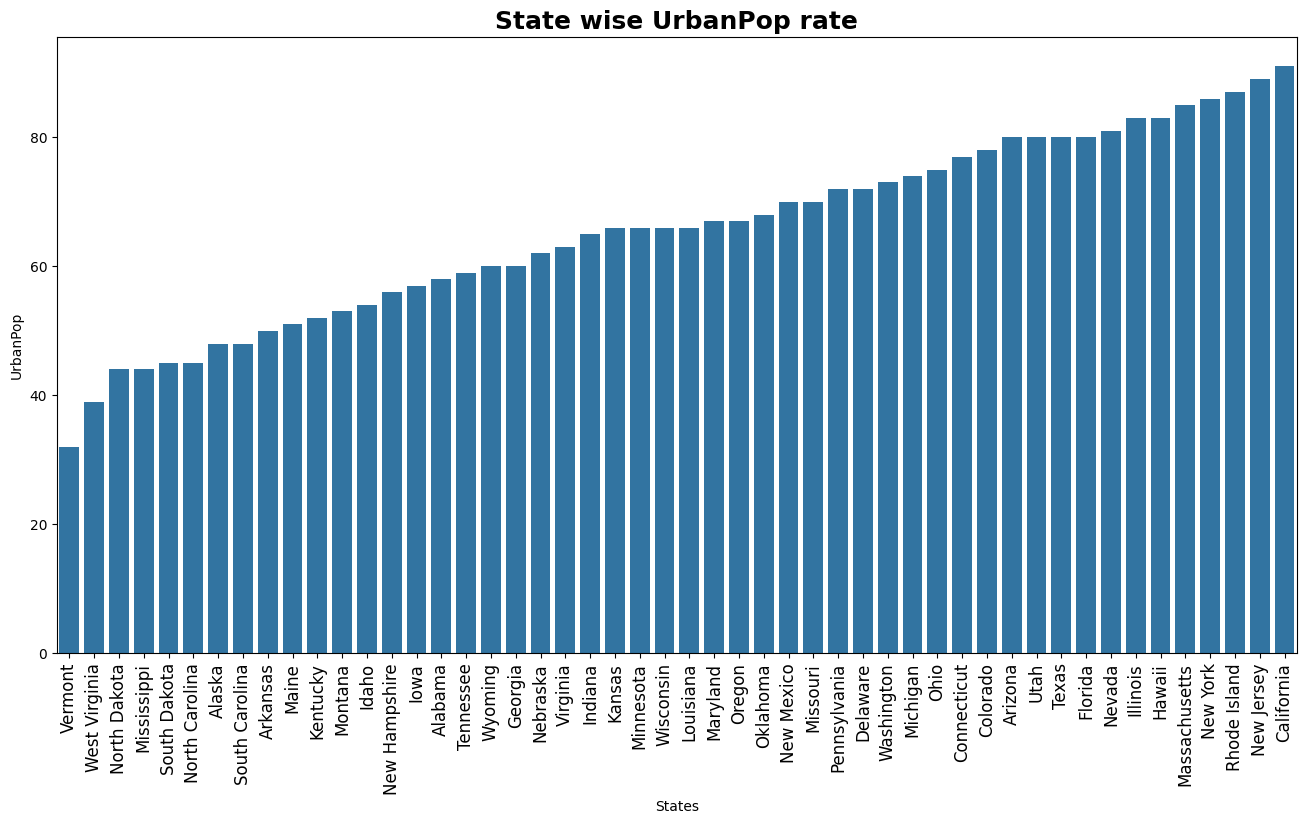

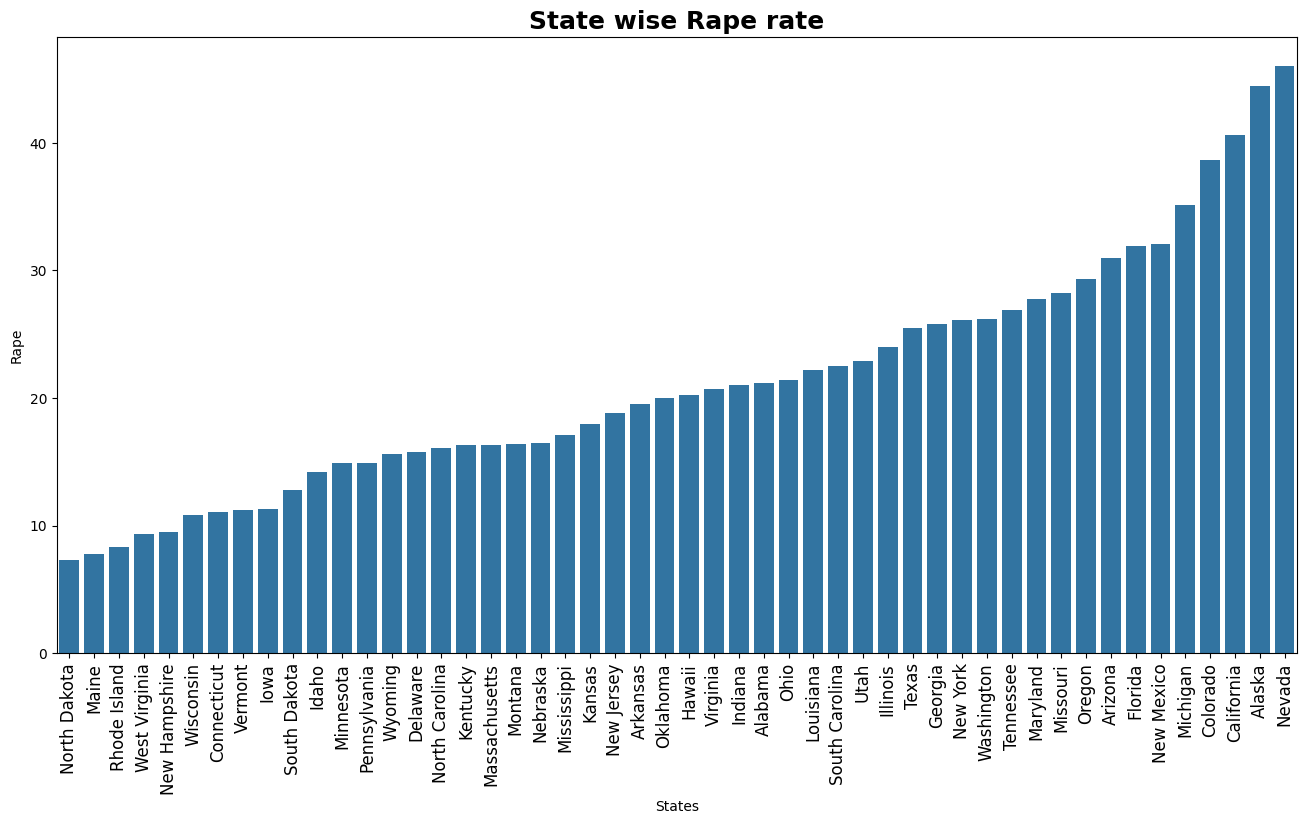

In [ ]:
for i in crime_data.columns[1:]:
    plt.figure(figsize=(16,8))
    sb.barplot(x=crime_data["States"],y=i, data=crime_data,
              order=crime_data.sort_values(i).States)
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("State wise "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

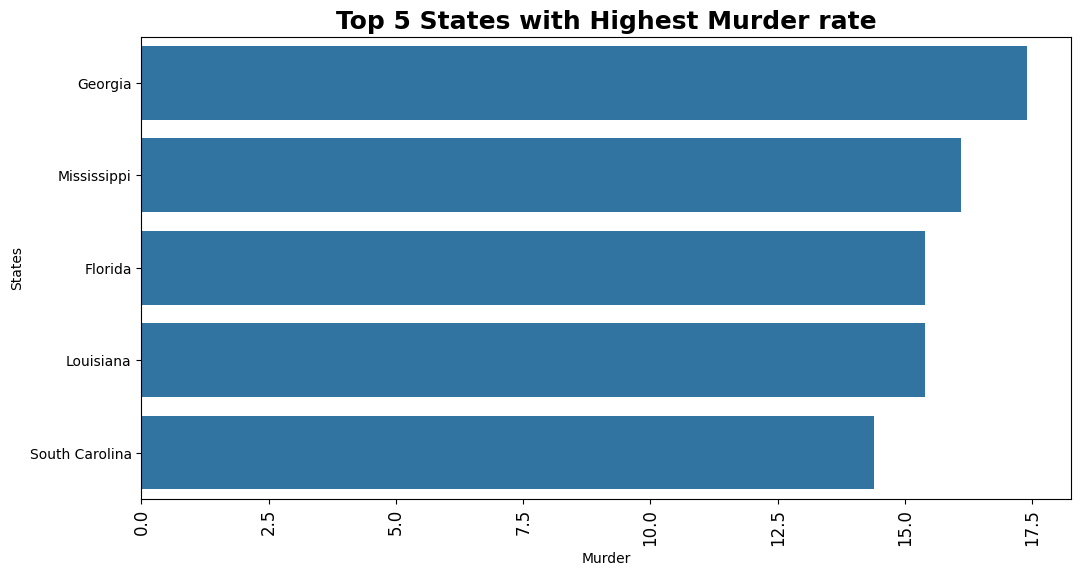

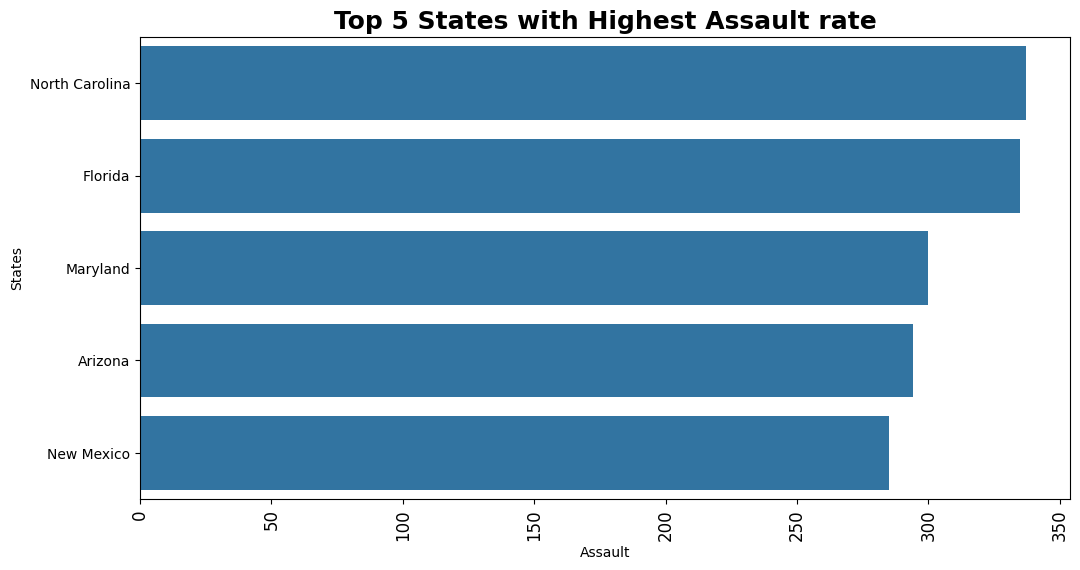

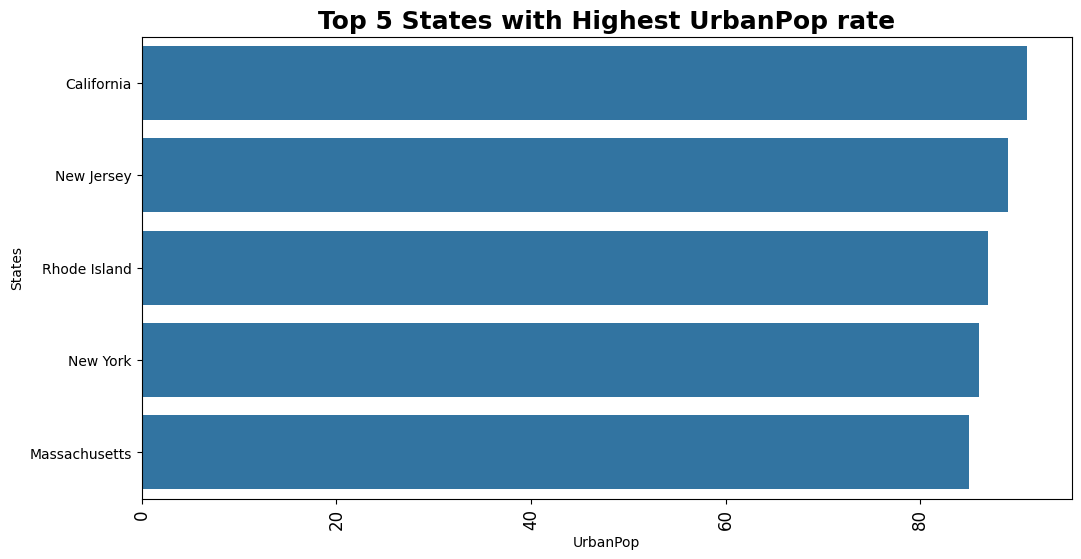

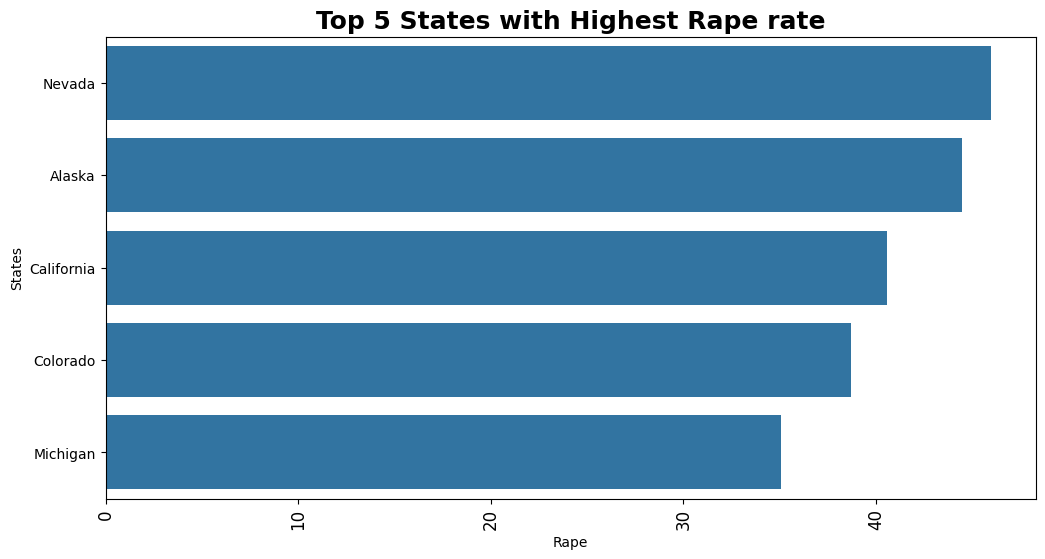

In [ ]:
for i in crime_data.columns[1:]:
    plt.figure(figsize=(12,6))
    sb.barplot(x=i,y=crime_data["States"], data=crime_data,
              order=crime_data.sort_values(i,ascending=False).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Highest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

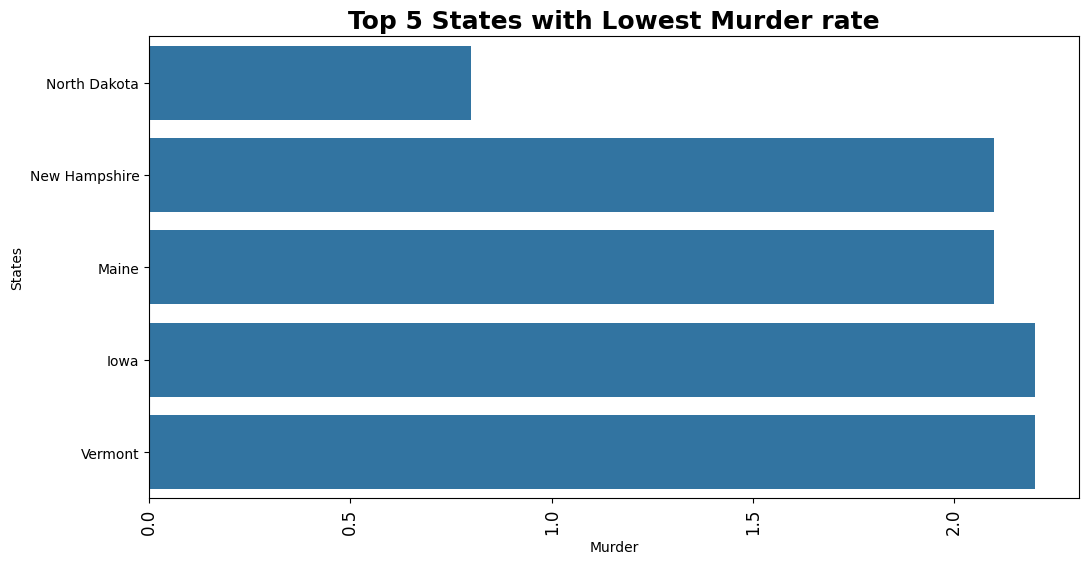

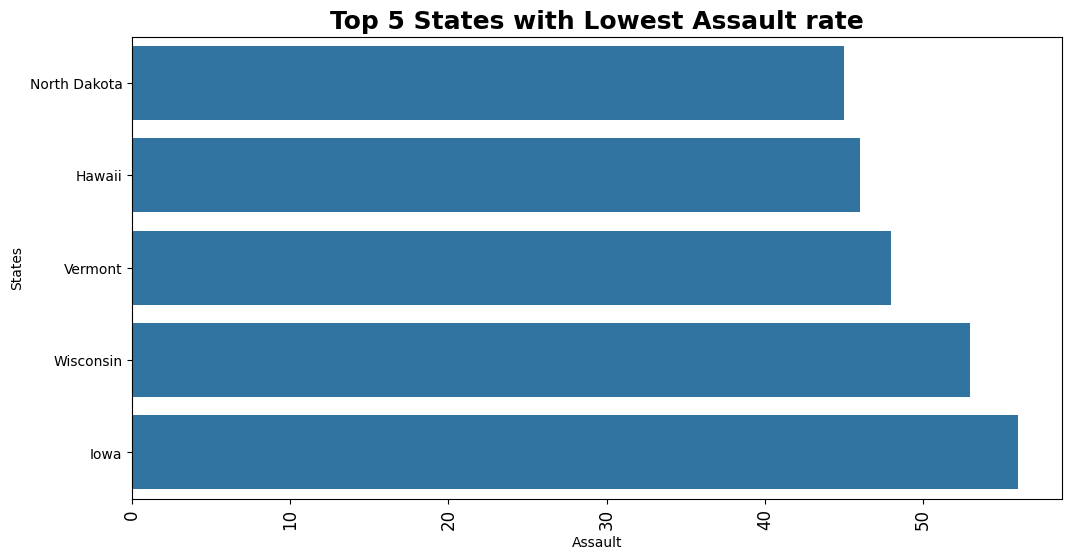

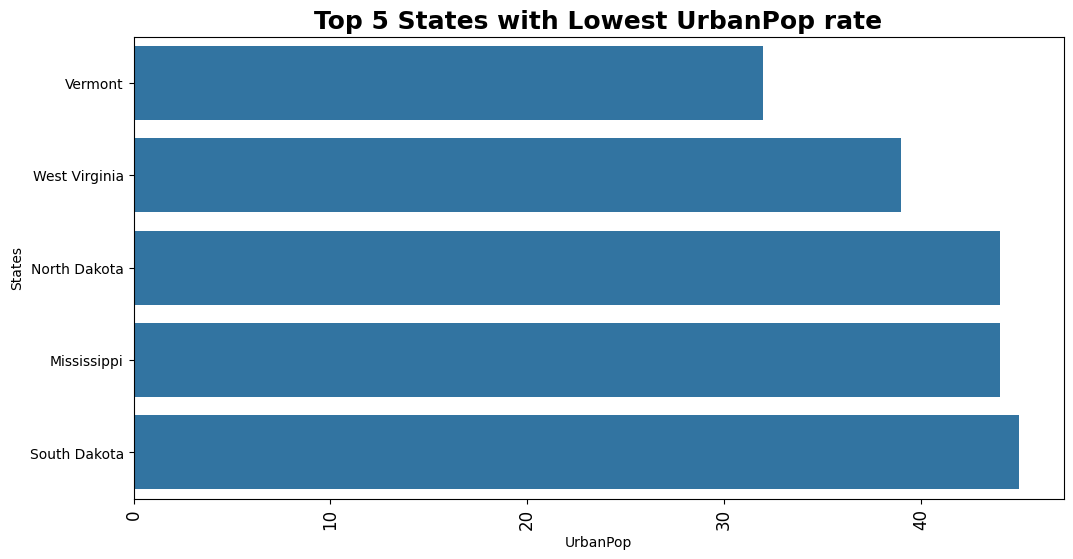

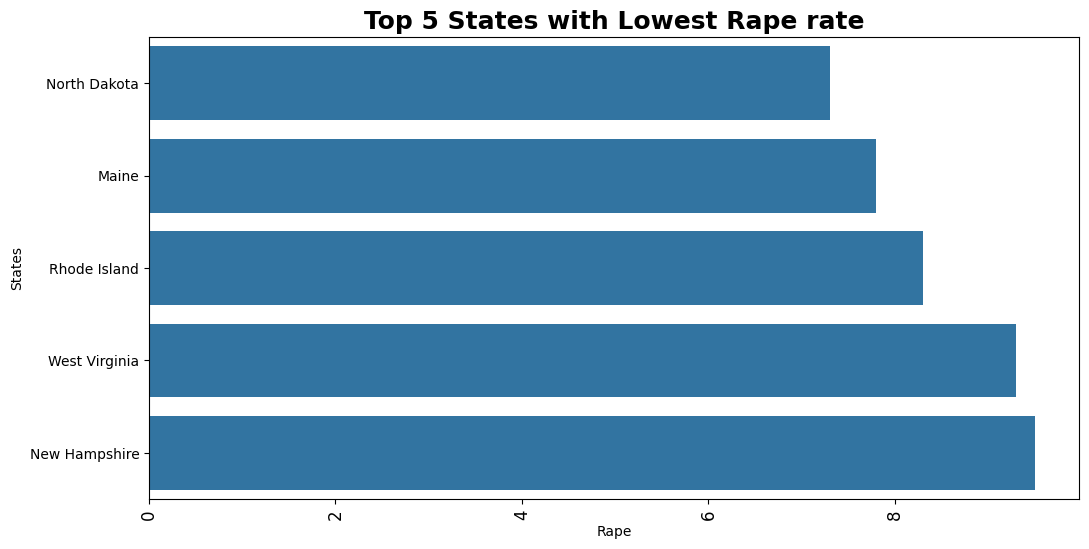

In [ ]:
for i in crime_data.columns[1:]:
    plt.figure(figsize=(12,6))
    sb.barplot(x=i,y=crime_data["States"], data=crime_data,
              order=crime_data.sort_values(i,ascending=True).States[:5])
    plt.xticks(rotation = 90,fontsize = 12)
    plt.title("Top 5 States with Lowest "+str(i)+" rate", fontsize=18, fontweight='bold')
plt.show()

In [ ]:
crime_data_mdf = crime_data.drop(['States'],axis=1)
crime_data_mdf.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
standard_scaler = StandardScaler()
crime_data_std = standard_scaler.fit_transform(crime_data_mdf)
crime_data_std.shape

(50, 4)

In [ ]:
min_max = MinMaxScaler()
crime_data_norm = min_max.fit_transform(crime_data_mdf)
crime_data_norm.shape

(50, 4)

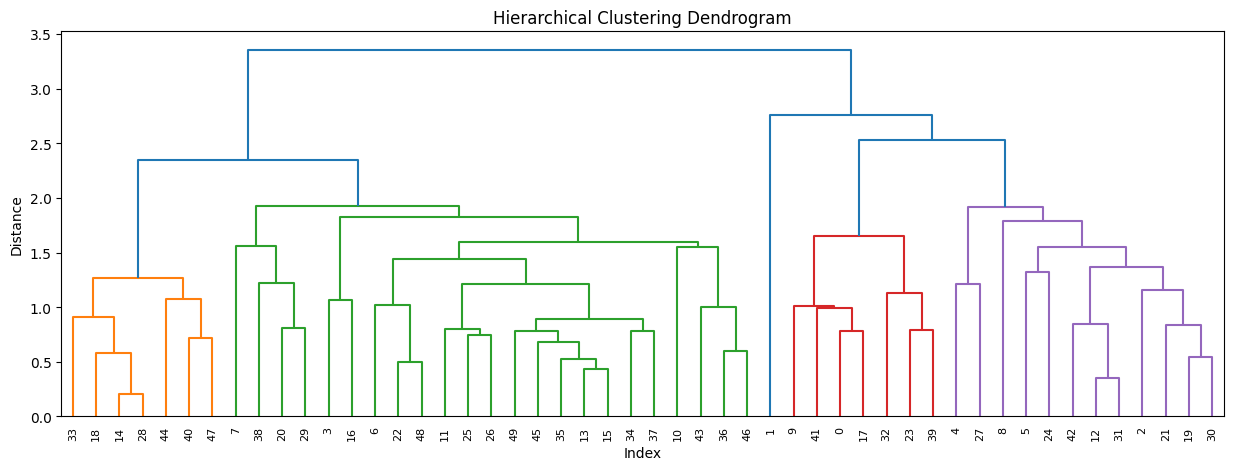

In [ ]:
z = linkage(crime_data_std, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [ ]:
for nc in range(2,6):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(crime_data_std)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.34863679190476177
For n_clusters = 4 The average silhouette_score is : 0.3636819420151221
For n_clusters = 5 The average silhouette_score is : 0.3212682619092323


In [ ]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(crime_data_std)
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
crime_data['clust']=cluster_labels
crime_data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,4.870000,114.433333,63.633333,15.943333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0


In [ ]:
h_cluster_0 = crime_data[(crime_data.clust==0)]
h_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [ ]:
h_cluster_1 = crime_data[(crime_data.clust==1)]
h_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [ ]:
h_cluster_2 = crime_data[(crime_data.clust==2)]
h_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2


In [ ]:
h_cluster_3 = crime_data[(crime_data.clust==3)]
h_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


<Figure size 960x480 with 0 Axes>

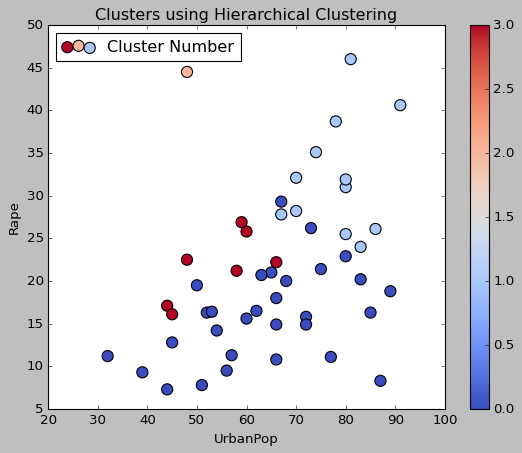

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="UrbanPop",y ="Rape",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

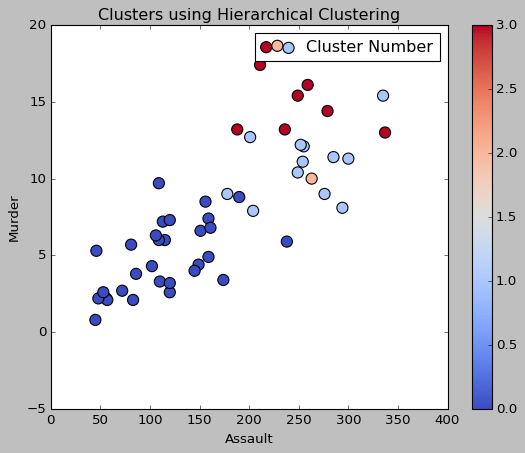

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

In [ ]:
slht_scr_hc = sklearn.metrics.silhouette_score(crime_data_std, cluster_labels)
slht_scr_hc

0.3636819420151221

## Using K-means Clustering model

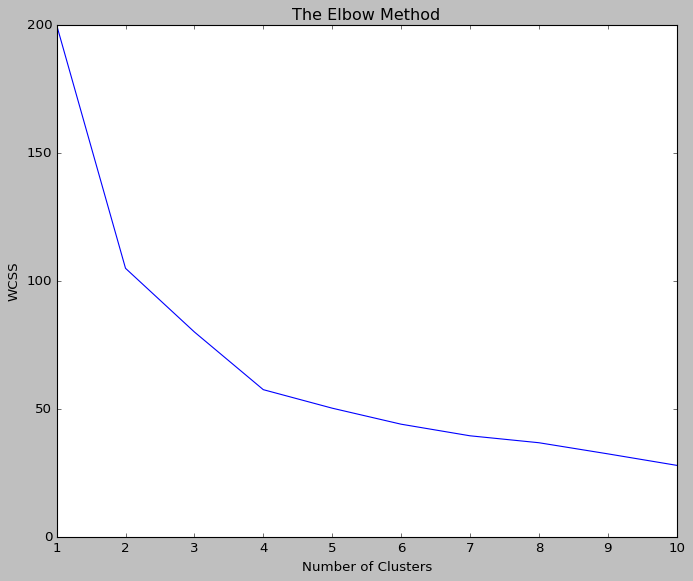

In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    k_cluster = KMeans(n_clusters=i)
    k_cluster.fit(crime_data_std)
    WCSS.append(k_cluster.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')

plt.show()

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best.
# '0' indicates clusters are overlapping
for nc in range(2,6):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(crime_data_std)
    slht_scr= sklearn.metrics.silhouette_score(crime_data_std, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263


In [ ]:
k_cluster = KMeans(n_clusters=4)
y_kmeans = k_cluster.fit_predict(crime_data_std)

In [ ]:
y_kmeans

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [ ]:
k_cluster.labels_

array([0, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 3, 1, 3, 1, 0, 1, 2, 3, 2,
       1, 0, 2, 1, 1, 2, 1, 3, 2, 2, 0, 1, 3, 3, 3, 3, 3, 0, 1, 0, 2, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [ ]:
k_cluster.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [ ]:
# Within cluster sum of squares or variance
k_cluster.inertia_

57.55425863091105

In [ ]:
ks = pd.Series(y_kmeans)
crime_data['clust']=ks
crime_data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [ ]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,13.937500,243.625000,53.750000,21.412500,0.0
1,3.600000,78.538462,52.076923,12.176923,1.0
2,10.815385,257.384615,76.000000,33.192308,2.0
3,5.656250,138.875000,73.875000,18.781250,3.0


In [ ]:
k_cluster_0 = crime_data[(crime_data.clust==0)]
k_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
k_cluster_1 = crime_data[(crime_data.clust==1)]
k_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [ ]:
k_cluster_2 = crime_data[(crime_data.clust==2)]
k_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [ ]:
k_cluster_3 = crime_data[(crime_data.clust==3)]
k_cluster_3

,States,Murder,Assault,UrbanPop,Rape,clust
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
10,Hawaii,5.3,46,83,20.2,3
13,Indiana,7.2,113,65,21.0,3
15,Kansas,6.0,115,66,18.0,3
20,Massachusetts,4.4,149,85,16.3,3
29,New Jersey,7.4,159,89,18.8,3
34,Ohio,7.3,120,75,21.4,3
35,Oklahoma,6.6,151,68,20.0,3
36,Oregon,4.9,159,67,29.3,3


<Figure size 960x480 with 0 Axes>

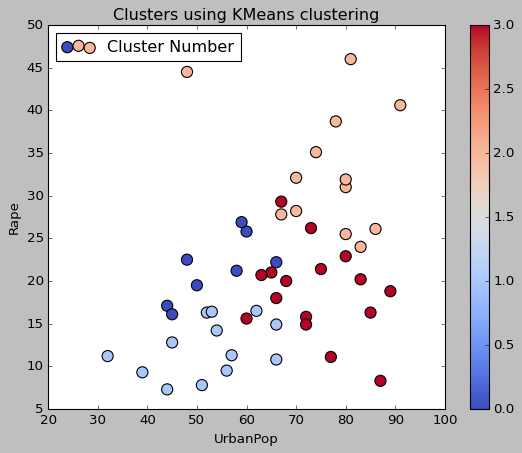

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="UrbanPop",y ="Rape",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

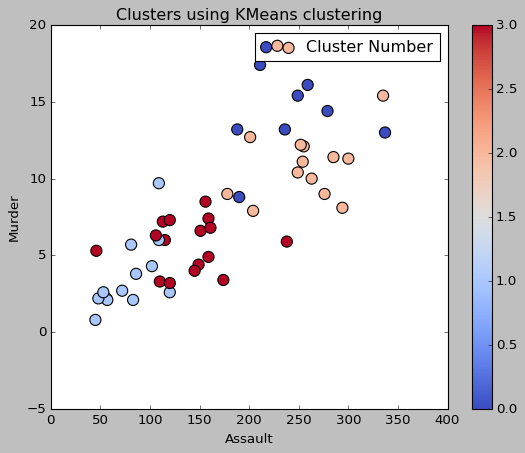

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=k_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans clustering')
plt.show()

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best.
# '0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(crime_data_std, k_cluster.labels_)
slht_scr_kc

0.33968891433344395

## DB Scan Clustering model

In [ ]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=8)
nn = nn.fit(crime_data_std)
distances, indices = nn.kneighbors(crime_data_std)

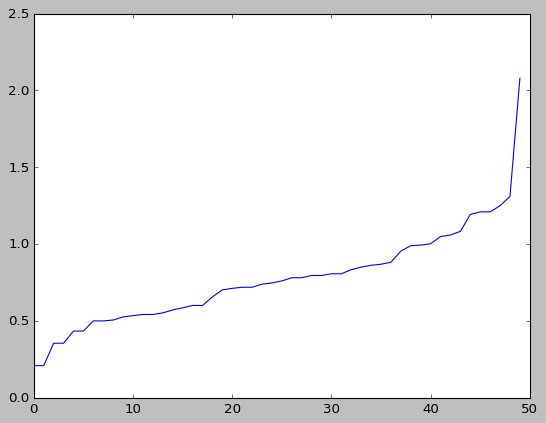

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=1.25, min_samples=5)
d_cluster.fit(crime_data_std)

DBSCAN(eps=1.25)

In [ ]:
d_cluster.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
ds = pd.Series(d_cluster.labels_)
crime_data['clust']=ds
crime_data

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [ ]:
crime_data.iloc[:,1:].groupby(crime_data.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
-1,12.616667,287.000,64.833333,32.700000,-1.0
0,14.720000,232.600,58.200000,23.720000,0.0
1,10.328571,263.000,76.857143,30.685714,1.0
2,5.243750,119.125,64.343750,16.625000,2.0


In [ ]:
d_cluster_neg1 = crime_data[(crime_data.clust==-1)]
d_cluster_neg1

,States,Murder,Assault,UrbanPop,Rape,clust
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [ ]:
d_cluster_0 = crime_data[(crime_data.clust==0)]
d_cluster_0

,States,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [ ]:
d_cluster_1 = crime_data[(crime_data.clust==1)]
d_cluster_1

,States,Murder,Assault,UrbanPop,Rape,clust
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
30,New Mexico,11.4,285,70,32.1,1
31,New York,11.1,254,86,26.1,1


In [ ]:
d_cluster_2 = crime_data[(crime_data.clust==2)]
d_cluster_2

,States,Murder,Assault,UrbanPop,Rape,clust
3,Arkansas,8.8,190,50,19.5,2
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2


<Figure size 960x480 with 0 Axes>

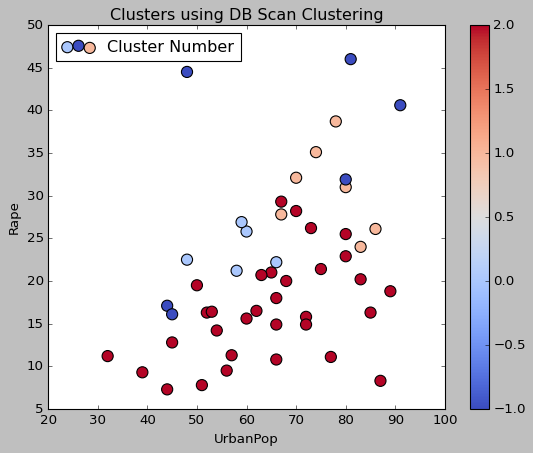

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="UrbanPop",y ="Rape",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using DB Scan Clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

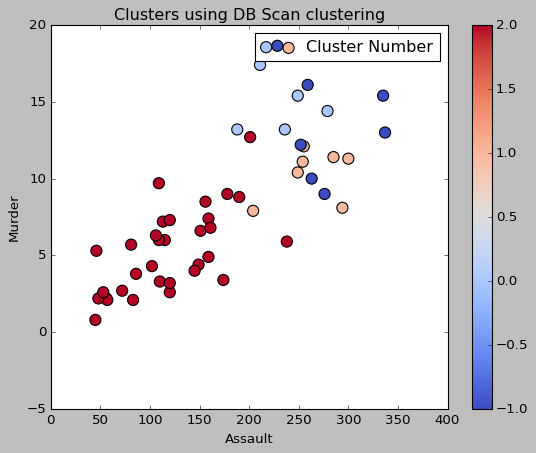

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using DB Scan clustering')
plt.show()

In [ ]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best.
# '0' indicates clusters are overlapping
slht_scr_dc = sklearn.metrics.silhouette_score(crime_data_std, d_cluster.labels_)
slht_scr_dc

0.23869670053300915

In [ ]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

The Silhouette score of Hierarchical Clustering: 0.3636819420151221
The Silhouette score of KMeans Clustering: 0.33968891433344395
The Silhouette score of DB Scan Clustering: 0.23869670053300915


<Figure size 960x480 with 0 Axes>

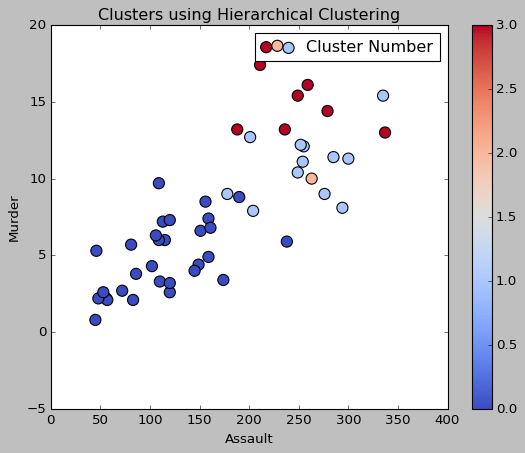

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number', kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

<Figure size 960x480 with 0 Axes>

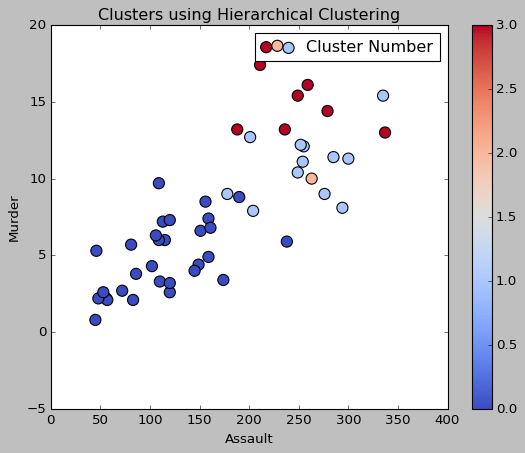

In [ ]:
plt.style.use(['classic'])
plt.figure(figsize=(12,6))
crime_data.plot(x="Assault",y ="Murder",c=cluster_labels,label = 'Cluster Number', kind="scatter",s=100 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using Hierarchical Clustering')
plt.show()

### The following can be observed from the above plot:
#### The States in Cluster-0 have less Murder, Assault and Rape rates and can be considered as Safe-Zone.
#### The States in Cluster-1 have moderate crime rates and can be considered as Moderate-Zone
#### The States in Cluster-3 have high crime rates and can be considered as Danger-Zone.

### The following can be observed from the EDA:
#### North Dakota is the state with lowest crime rate and can be considered as the safest place.
#### Florida is the state with high crime rate and is not a safe place.

# Recommendation

The Police has to concentrate more on states in moderate and danger zone. They have to take necessary steps to decrease the crime rate.
Meanwhile the citizens are suggested to stay in the safe zone.